<center><h1><b>911 Calls</b></h1></center>

In [1]:
# importing libraries
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
import cufflinks as cf

cf.go_offline()
init_notebook_mode(connected = True)
sns.set_style('whitegrid')
%matplotlib inline

# data
from urllib.request import urlopen
import json

In [2]:
# dataset
nineoneone = pd.read_csv('911.csv')
nineoneone.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
# dataset information
nineoneone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
# top 5 most common zipcodes for 911 calls
nineoneone['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [5]:
# top 5 most common townships for 911 calls
nineoneone['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [6]:
# creating a new table called "department"
nineoneone['department'] = nineoneone['title'].apply(lambda title: title.split(':')[0])
nineoneone.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,department
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [7]:
# department value counts
department_df = pd.DataFrame([nineoneone['department'].unique(), nineoneone['department'].value_counts()]).transpose()
department_df.columns = ['department', 'value count']
department_df

for index, row in department_df.iterrows():
    print(
        'There are {} emergency calls under {} department'.format(row['value count'], row['department'])    
    )

There are 48877 emergency calls under EMS department
There are 35695 emergency calls under Fire department
There are 14920 emergency calls under Traffic department


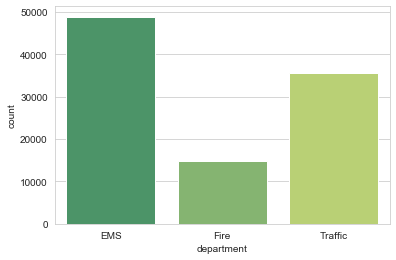

In [8]:
# countplot for comparison
sns.countplot(x = 'department', data = nineoneone, palette = 'summer')

In [9]:
# timestamp is in string type and has to be converted into datetime type
nineoneone['timeStamp'] = pd.to_datetime(nineoneone['timeStamp'])
type(nineoneone['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
# separating all attributes of time
nineoneone['hour'] = nineoneone['timeStamp'].apply(lambda time: time.hour)
nineoneone['month'] = nineoneone['timeStamp'].apply(lambda time: time.month)
nineoneone['day'] = nineoneone['timeStamp'].apply(lambda time: time.dayofweek)
nineoneone.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,department,hour,month,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [11]:
# transform day into actual string name
day_dict = {
    0 : 'Monday',
    1 : 'Tuesday',
    2 : 'Wednesday',
    3 : 'Thursday',
    4 : 'Friday',
    5 : 'Saturday',
    6 : 'Sunday'
}

nineoneone['day'] = nineoneone['day'].map(day_dict)
nineoneone.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,department,hour,month,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thursday


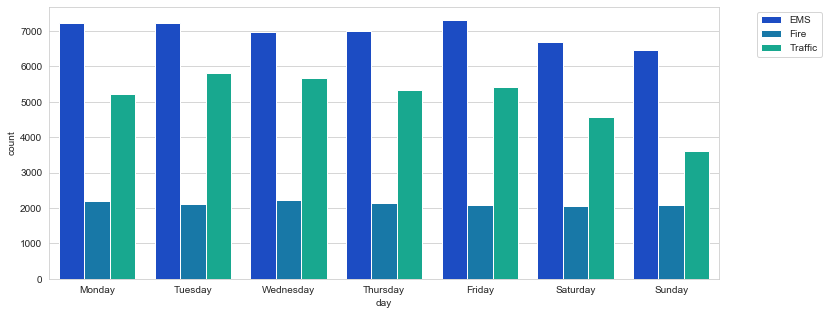

In [12]:
# day comparison given department
plt.figure(figsize = (12, 5))
sns.countplot(x = 'day', data = nineoneone, order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], hue = 'department', palette = 'winter')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = None)

In [13]:
# creating a new column
nineoneone['month_str'] = nineoneone['month'].copy()
nineoneone.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,department,hour,month,day,month_str
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thursday,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thursday,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thursday,12


In [14]:
# transform month_str into actual string name
month_dict = {
    1  : 'January',
    2  : 'February',
    3  : 'March',
    4  : 'April',
    5  : 'May',
    6  : 'June',
    7  : 'July',
    8  : 'August',
    9  : 'September',
    10 : 'October',
    11 : 'November',
    12 : 'December'
}

nineoneone['month_str'] = nineoneone['month_str'].map(month_dict)
nineoneone.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,department,hour,month,day,month_str
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday,December
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday,December
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thursday,December
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thursday,December
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thursday,December


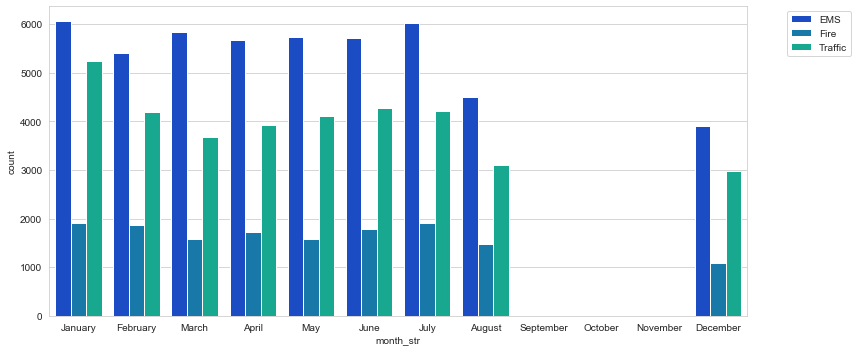

In [15]:
# month comparison given department
plt.figure(figsize = (12, 5))
sns.countplot(
    x = 'month_str', 
    data = nineoneone, 
    order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], 
    hue = 'department', 
    palette = 'winter'
)

plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = None)
plt.tight_layout()

In [16]:
# grouping data by month_str
month_str_df = nineoneone.groupby('month_str').count().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']).reset_index()
month_str_df

,month_str,lat,lng,desc,zip,title,timeStamp,twp,addr,e,department,hour,month,day
0,January,13205.0,13205.0,13205.0,11527.0,13205.0,13205.0,13203.0,13096.0,13205.0,13205.0,13205.0,13205.0,13205.0
1,February,11467.0,11467.0,11467.0,9930.0,11467.0,11467.0,11465.0,11396.0,11467.0,11467.0,11467.0,11467.0,11467.0
2,March,11101.0,11101.0,11101.0,9755.0,11101.0,11101.0,11092.0,11059.0,11101.0,11101.0,11101.0,11101.0,11101.0
3,April,11326.0,11326.0,11326.0,9895.0,11326.0,11326.0,11323.0,11283.0,11326.0,11326.0,11326.0,11326.0,11326.0
4,May,11423.0,11423.0,11423.0,9946.0,11423.0,11423.0,11420.0,11378.0,11423.0,11423.0,11423.0,11423.0,11423.0
5,June,11786.0,11786.0,11786.0,10212.0,11786.0,11786.0,11777.0,11732.0,11786.0,11786.0,11786.0,11786.0,11786.0
6,July,12137.0,12137.0,12137.0,10633.0,12137.0,12137.0,12133.0,12088.0,12137.0,12137.0,12137.0,12137.0,12137.0
7,August,9078.0,9078.0,9078.0,7832.0,9078.0,9078.0,9073.0,9025.0,9078.0,9078.0,9078.0,9078.0,9078.0
8,September,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,October,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# grouping data by month
month_df = nineoneone.groupby('month').count().reset_index()
month_df

,month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,department,hour,day,month_str
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


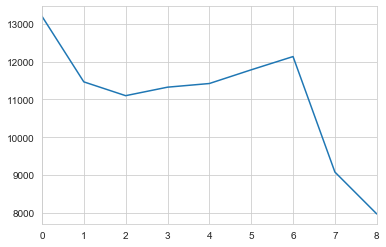

In [18]:
# plotting line plot
month_df['lat'].plot()

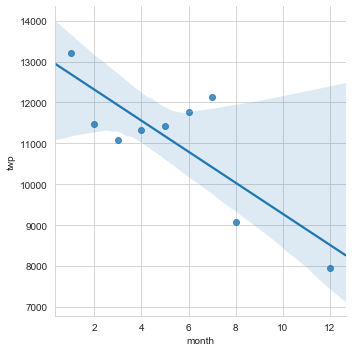

In [19]:
# plotting trend line
sns.lmplot(x = 'month', y = 'twp', data = month_df)

In [20]:
# creating date column
nineoneone['date'] = nineoneone['timeStamp'].apply(lambda t: t.date())
nineoneone.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,department,hour,month,day,month_str,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday,December,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday,December,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thursday,December,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thursday,December,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thursday,December,2015-12-10


In [21]:
# exporting the cleaned data
# nineoneone.to_csv('911_cleaned.csv')

In [22]:
# comparison by day
day_df = nineoneone.groupby(['day', 'department']).count().unstack()
day_df = day_df.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_df

lat                 lng                desc                 zip  \
department   EMS  Fire Traffic   EMS  Fire Traffic   EMS  Fire Traffic   EMS   
day                                                                            
Monday      7240  2204    5236  7240  2204    5236  7240  2204    5236  6554   
Tuesday     7222  2121    5807  7222  2121    5807  7222  2121    5807  6552   
Wednesday   6966  2227    5686  6966  2227    5686  6966  2227    5686  6293   
Thursday    6993  2136    5349  6993  2136    5349  6993  2136    5349  6371   
Friday      7315  2088    5430  7315  2088    5430  7315  2088    5430  6587   
Saturday    6685  2068    4583  6685  2068    4583  6685  2068    4583  6114   
Sunday      6456  2076    3604  6456  2076    3604  6456  2076    3604  5856   

            ...    hour month               month_str                date  \
department  ... Traffic   EMS  Fire Traffic       EMS  Fire Traffic   EMS   
day         ...                                                             
Monday      ...    5236  7240  2204    5236      7240  2204    5236  7240   
Tuesday     ...    5807  7222  2121    5807      7222  2121    5807  7222   
Wednesday   ...    5686  6966  2227    5686      6966  2227    5686  6966   
Thursday    ...    5349  6993  2136    5349      6993  2136    5349  6993   
Friday      ...    5430  7315  2088    5430      7315  2088    5430  7315   
Saturday    ...    4583  6685  2068    4583      6685  2068    4583  6685   
Sunday      ...    3604  6456  2076    3604      6456  2076    3604  6456   

                          
department  Fire Traffic  
day                       
Monday      2204    5236  
Tuesday     2121    5807  
Wednesday   2227    5686  
Thursday    2136    5349  
Friday      2088    5430  
Saturday    2068    4583  
Sunday      2076    3604  

[7 rows x 39 columns]

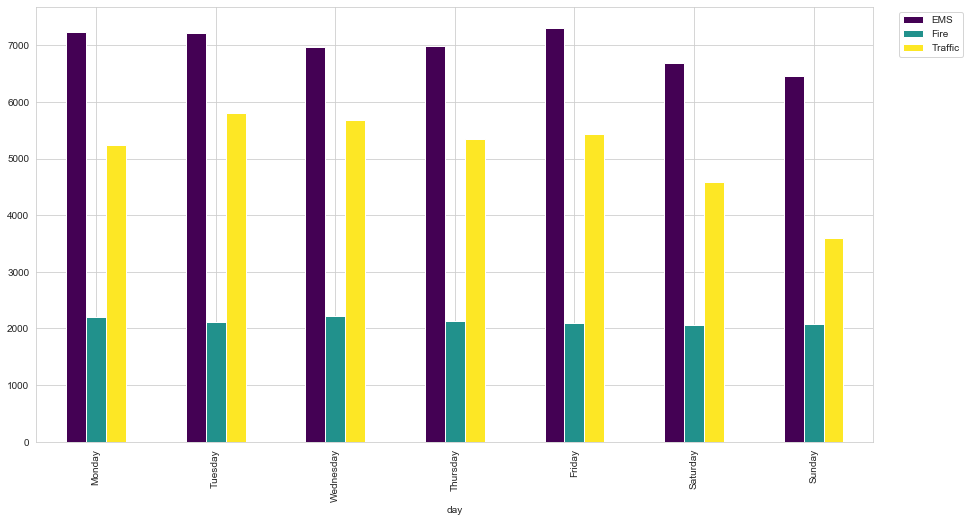

In [23]:
# barplot
day_df['e'].plot(kind = 'bar', stacked = False, figsize = (15, 8), colormap = 'viridis', sort_columns = True)
plt.legend(loc = 'upper left', bbox_to_anchor = (1.025, 1))

In [24]:
# group by date
date_df = nineoneone.groupby('date').count()
date_df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,department,hour,month,day,month_str
date,,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447,447


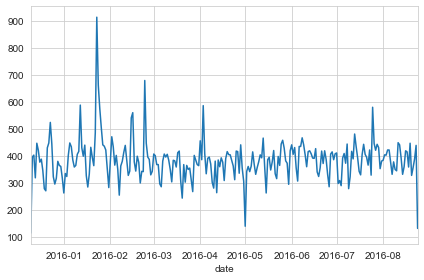

In [25]:
# plot
date_df['lat'].plot()
plt.tight_layout()

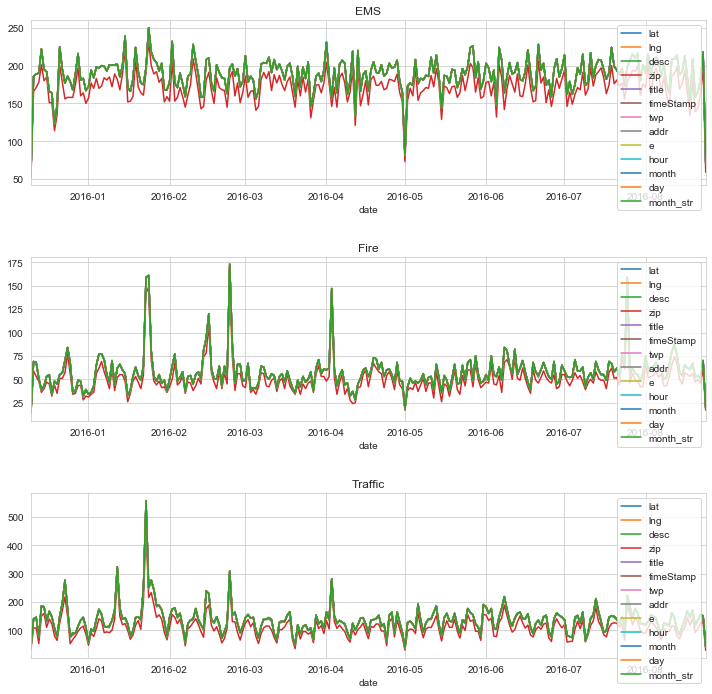

In [26]:
# plot given department
department_df = nineoneone.groupby(by = ['date', 'department']).count().reset_index()

fig, axes = plt.subplots(nrows = len(department_df['department'].unique()), figsize = (10, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for department, ax in zip(department_df['department'].unique(), axes):
    department_df[department_df['department'] == department].plot(x = 'date', title = department, ax = ax)
    
plt.tight_layout()

In [27]:
# group by day and hour
dayhour_df = nineoneone.groupby(by = ['day', 'hour']).count()['department'].unstack()
dayhour_df

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Friday,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Monday,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Saturday,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sunday,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thursday,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tuesday,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wednesday,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


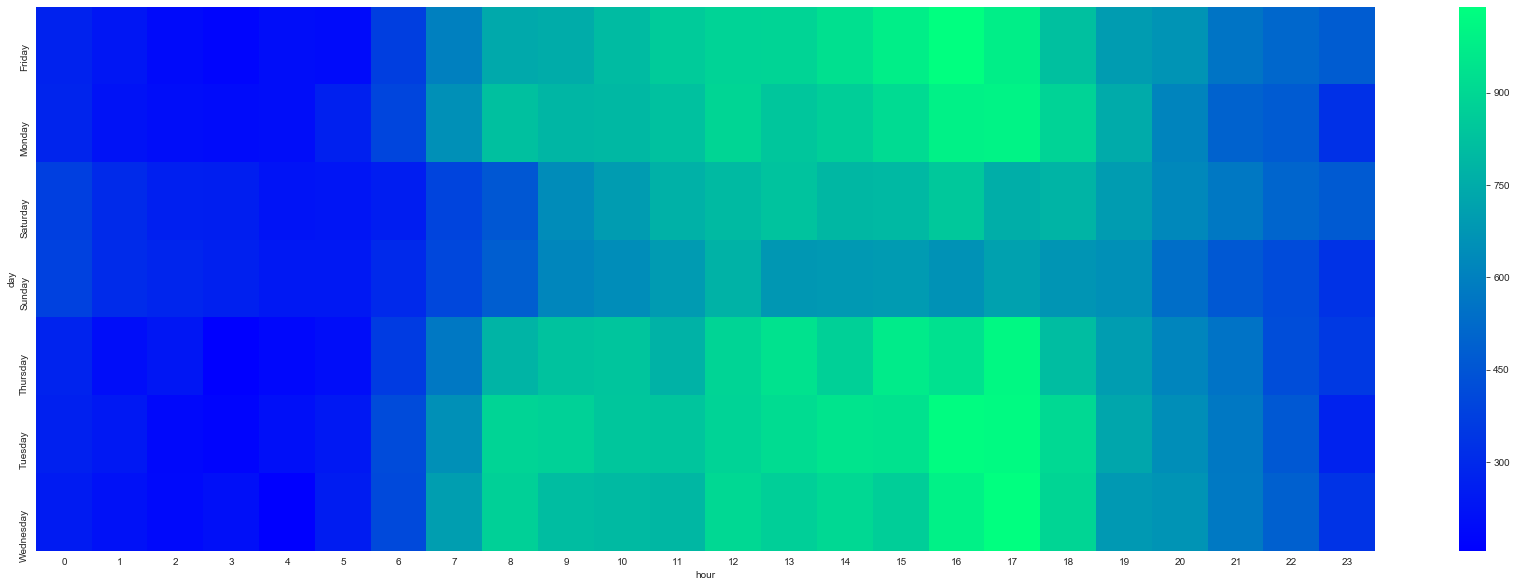

In [28]:
# heatmap
plt.figure(figsize = (30, 10))
sns.heatmap(dayhour_df, cmap = 'winter')

<Figure size 2160x1080 with 0 Axes>

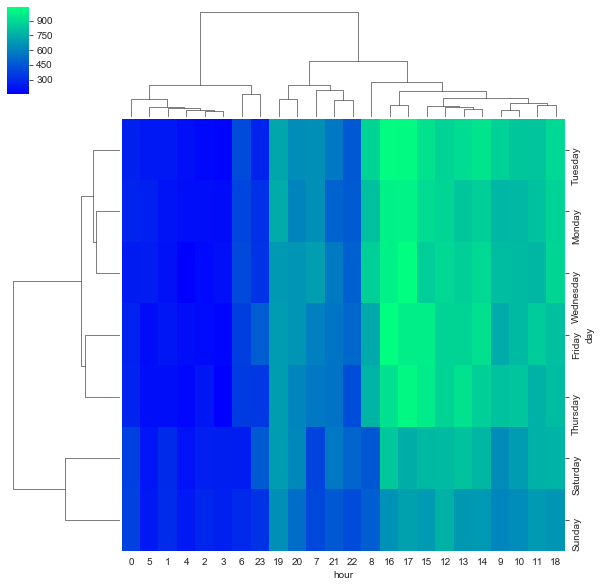

In [29]:
# clustermap
plt.figure(figsize = (30, 15))
sns.clustermap(dayhour_df, cmap = 'winter')

In [30]:
# group by month and day
monthday_df = nineoneone.groupby(by = ['month_str', 'day']).count()['department'].unstack()
monthday_df

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month_str,,,,,,,
April,1958,1598,1734,1488,1601,1430,1517
August,1310,1511,1099,1021,1230,1612,1295
December,1065,1257,978,907,1266,1234,1262
February,1581,1964,1441,1229,1596,1753,1903
January,1970,1727,2291,1960,1584,1973,1700
July,2045,1692,1695,1672,1646,1670,1717
June,1649,1617,1388,1333,2065,1676,2058
March,1525,1535,1266,1102,1900,1884,1889
May,1730,1779,1444,1424,1590,1918,1538


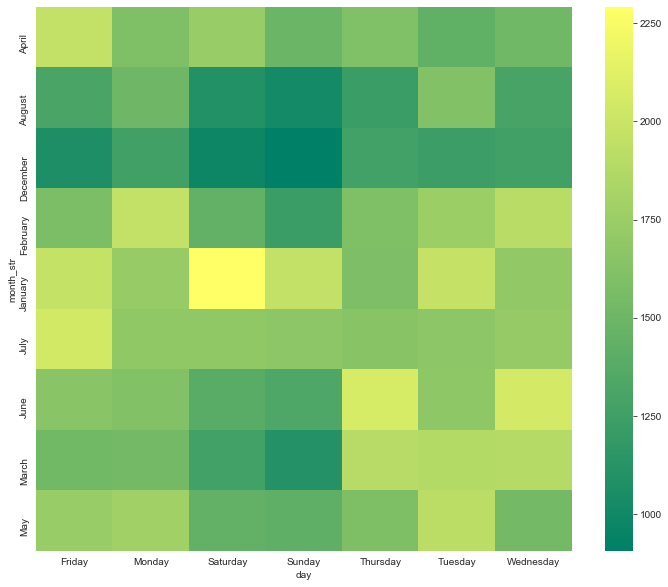

In [31]:
# heatmap
plt.figure(figsize = (12, 10))
sns.heatmap(monthday_df, cmap = 'summer')

<Figure size 864x720 with 0 Axes>

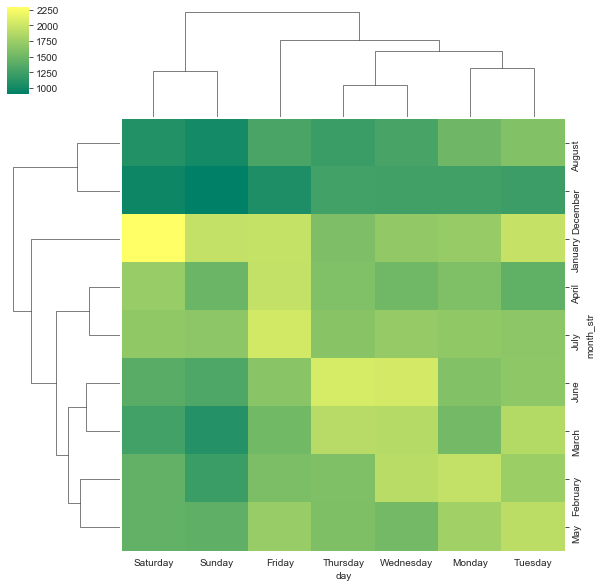

In [32]:
# clustermap
plt.figure(figsize = (12, 10))
sns.clustermap(monthday_df, cmap = 'summer')